In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
df = pd.read_csv('telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [54]:
custid = ['customerID']
target = ['Churn']

In [55]:
categorical = df.nunique()[df.nunique()<10].keys().tolist()

In [56]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [57]:
categorical.remove(target[0])

In [58]:
numerical = [col for col in df.columns if col not in custid+target+categorical]

In [59]:
telco = pd.get_dummies(data=df, columns=categorical, drop_first=True)

In [60]:
df[numerical].dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges       object
dtype: object

In [61]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical])

In [63]:
telco = telco.drop(['Churn', 'customerID'], axis=1)

In [64]:
telco[numerical] = scaled_numerical

In [65]:
telco.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.994194,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.066327,-0.259629,-0.173740,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-1.236724,-0.362660,-0.959649,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.514251,-0.746535,-0.195248,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-1.236724,0.197365,-0.940457,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [67]:
telco = pd.concat([telco, df[['Churn']]], axis=1)

In [68]:
is_NaN = telco.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [69]:
telco = telco.dropna()

In [91]:
telco['Churn'] = np.where(telco['Churn']=='Yes', 1, 0)

In [93]:
y = telco[['Churn']]
X = telco.drop(['Churn'], axis=1)

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=0.25, stratify=y)
dt = DecisionTreeClassifier(max_depth=5, 
        criterion = 'gini', splitter  = 'best')
dt_model = dt.fit(X_train, y_train)
y_predicted = dt_model.predict(X_test)
print("Training accuracy: ", np.round(dt_model.score(X_train, y_train), 3)) 
print("Test accuracy: ", np.round(accuracy_score(y_test, y_predicted), 3))

Training accuracy:  0.801
Test accuracy:  0.786


In [96]:
from sklearn.cluster import KMeans
import pandas as pd
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusterd_X = X.assign(Cluster=kmeans.labels_)

In [97]:
clusterd_X.groupby("Cluster").mean()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.044922,0.829029,1.281688,0.501781,0.204809,0.691006,0.347284,0.930543,0.069457,0.699466,...,0.0,0.718611,0.0,0.722173,0.311665,0.426981,0.691006,0.312556,0.296082,0.074800
1,-0.681863,0.108225,-0.549167,0.504593,0.192897,0.339253,0.208818,0.839559,0.160441,0.323331,...,0.0,0.333435,0.0,0.339559,0.125230,0.028475,0.664727,0.149418,0.483160,0.214636
2,-0.069362,-1.451926,-0.713877,0.509211,0.034211,0.482237,0.419079,1.000000,0.000000,0.223684,...,1.0,0.000000,1.0,0.000000,0.238816,0.416447,0.292763,0.217763,0.080263,0.483553


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [104]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)
train_accuracy = round(accuracy_score(y_train, y_train_pred), 3)
test_accuracy = round(accuracy_score(y_test, y_test_pred), 3)
print('Training accuracy: ', train_accuracy)
print('test accuracy: ', test_accuracy)

Training accuracy:  0.804
test accuracy:  0.809


In [107]:
from sklearn.metrics import precision_score, recall_score
train_precision=round(precision_score(y_train, y_train_pred), 3)
test_precision=round(precision_score(y_test, y_test_pred), 3)
train_recall=round(recall_score(y_train, y_train_pred), 3)
test_recall=round(recall_score(y_test, y_test_pred), 3)
print('Training precision: {}, Training recall: {}'.format(train_precision, train_recall))
print('Test precision: {}, test recall: {}'.format(test_precision, test_recall))

Training precision: 0.658, Training recall: 0.549
Test precision: 0.662, test recall: 0.574


In [109]:
logreg = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
logreg.fit(X_train, y_train)

C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [128]:
C = [1, 0.5, 0.25, 0.05, 0.025, 0.01, .005, .0025]
l1_metrics = np.zeros((len(C), 5))
l1_metrics[:,0] = C
for idx in range(0, len(C)):
    logreg = LogisticRegression(penalty='l1', C=C[idx], solver='liblinear')
    logreg.fit(X_train, y_train)
    y_test_pred = logreg.predict(X_test)
    l1_metrics[idx, 1] = np.count_nonzero(logreg.coef_)
    l1_metrics[idx,2] = accuracy_score(y_test, y_test_pred)
    l1_metrics[idx, 3] = precision_score(y_test, y_test_pred)
    l1_metrics[idx, 4] = recall_score(y_test, y_test_pred)
col_names = ['C', 'Coeffs', 'Accuracy', 'Precision', 'Recall']
print(pd.DataFrame(l1_metrics, columns=col_names))

C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


        C  Coeffs  Accuracy  Precision    Recall
0  1.0000    23.0  0.811149   0.666667  0.578158
1  0.5000    25.0  0.808305   0.662500  0.567452
2  0.2500    20.0  0.806598   0.659950  0.561028
3  0.0500    14.0  0.810011   0.676393  0.546039
4  0.0250    12.0  0.800341   0.664773  0.501071
5  0.0100     8.0  0.799772   0.700348  0.430407
6  0.0050     3.0  0.795222   0.739910  0.353319
7  0.0025     2.0  0.736633   1.000000  0.008565


C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

In [123]:
depth_list = list(range(2,15))
depth_tuning = np.zeros((len(depth_list), 4))
depth_tuning[:,0] = depth_list
for idx in range(len(depth_list)):
    dt = DecisionTreeClassifier(max_depth=depth_list[idx])
    dt.fit(X_train, y_train)
    y_test_pred = dt.predict(X_test)
    depth_tuning[idx, 1] = accuracy_score(y_test, y_test_pred)
    depth_tuning[idx, 2] = precision_score(y_test, y_test_pred)
    depth_tuning[idx, 3] = recall_score(y_test, y_test_pred)
    
col_names = ['Max_Depth', 'Accuracy', 'Precision', 'Recall']
print(pd.DataFrame(depth_tuning, columns=col_names))

    Max_Depth  Accuracy  Precision    Recall
0         2.0  0.796928   0.706767  0.402570
1         3.0  0.796928   0.706767  0.402570
2         4.0  0.792947   0.739535  0.340471
3         5.0  0.786689   0.632948  0.468951
4         6.0  0.794084   0.652174  0.481799
5         7.0  0.783845   0.627566  0.458244
6         8.0  0.779295   0.604222  0.490364
7         9.0  0.771900   0.583333  0.494647
8        10.0  0.765643   0.563218  0.524625
9        11.0  0.765074   0.557692  0.558887
10       12.0  0.756542   0.543430  0.522484
11       13.0  0.745165   0.519669  0.537473
12       14.0  0.740046   0.510163  0.537473


In [146]:
dt = DecisionTreeClassifier(max_depth=2, 
        criterion = 'gini', splitter  = 'best')
dt_model = dt.fit(X_train, y_train)

In [153]:
import matplotlib.pyplot as plt
feature_names = pd.DataFrame(X_train.columns, columns=['Feature'])
importance = pd.DataFrame(np.transpose(dt.feature_importances_), columns=['importance'])
#importance = dt.feature_importances_
#importance = pd.DataFrame([x for x in importance], columns=['importance'])
coefficients = pd.concat([feature_names, importance], axis = 1)
print(coefficients.sort_values(by=['importance'], ascending=False))

                                  Feature  importance
10            InternetService_Fiber optic    0.503894
0                                  tenure    0.496106
16   DeviceProtection_No internet service    0.000000
28         PaymentMethod_Electronic check    0.000000
27  PaymentMethod_Credit card (automatic)    0.000000
26                   PaperlessBilling_Yes    0.000000
25                      Contract_Two year    0.000000
24                      Contract_One year    0.000000
23                    StreamingMovies_Yes    0.000000
22    StreamingMovies_No internet service    0.000000
21                        StreamingTV_Yes    0.000000
20        StreamingTV_No internet service    0.000000
19                        TechSupport_Yes    0.000000
18        TechSupport_No internet service    0.000000
17                   DeviceProtection_Yes    0.000000
15                       OnlineBackup_Yes    0.000000
1                          MonthlyCharges    0.000000
14       OnlineBackup_No int

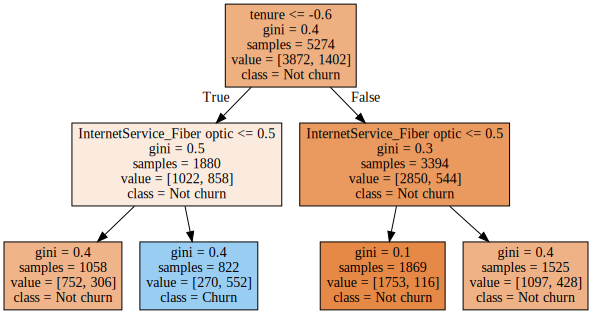

In [154]:
from sklearn.tree import export_graphviz
import graphviz
exported = export_graphviz(
            decision_tree=dt,
            out_file=None,
            feature_names=X_train.columns,
            precision=1,
            class_names=['Not churn', 'Churn'],
            filled = True)
graph=graphviz.Source(exported)
display(graph)

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [156]:
feature_names = pd.DataFrame(X_train.columns, columns=['Feature'])
log_coef = pd.DataFrame(np.transpose(logreg.coef_), columns=['Coefficient'])
coefficients = pd.concat([feature_names, log_coef], axis = 1)

coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])
coefficients = coefficients[coefficients['Coefficient']!=0]
print(coefficients.sort_values(by=['Exp_Coefficient']))

                                  Feature  Coefficient  Exp_Coefficient
25                      Contract_Two year    -1.456782         0.232985
0                                  tenure    -1.370830         0.253896
24                      Contract_One year    -0.736741         0.478671
19                        TechSupport_Yes    -0.431430         0.649580
13                     OnlineSecurity_Yes    -0.314050         0.730482
7                        PhoneService_Yes    -0.263224         0.768569
6                          Dependents_Yes    -0.172660         0.841423
15                       OnlineBackup_Yes    -0.123923         0.883448
22    StreamingMovies_No internet service    -0.115107         0.891270
20        StreamingTV_No internet service    -0.115107         0.891270
18        TechSupport_No internet service    -0.115107         0.891270
16   DeviceProtection_No internet service    -0.115107         0.891270
14       OnlineBackup_No internet service    -0.115107         0